## Instacart 2017 

This analysis contains some insights on shoppers from Instacart from 2017. The goal of our analysis is to find which products are most popular, the days and hours of the week that people tend to order, the distribution of the number of orders per customer, and the proportion of reorders for products. 

We will analyze this information by taking the steps below:

# Analysis of Instacart 2017
* [1. Opening and reading the files](#loading)
* [2. Preprocessing the data](#removing_values)
    * [2.1 Preprocessing Summmary](#preprocessing_summary)
* [3. Analyzing the data](#analyze)

## Loading the Data <a id='loading'></a>

In [62]:
import pandas as pd 
import numpy as np 

In [63]:
#reading in the data
insta_orders = pd.read_csv('instacart_orders.csv', sep=',')
products = pd.read_csv('products.csv', sep=',')
order_products = pd.read_csv('order_products.csv', sep=',')
aisles = pd.read_csv('aisles.csv', sep=',')
departments = pd.read_csv('departments.csv', sep=',')

In [64]:
#looking at table
insta_orders.head()

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,1515936,183418,11,6,13,30.0
1,1,1690866,163593,5,5,12,9.0
2,2,1454967,39980,4,5,19,2.0
3,3,1768857,82516,56,0,20,10.0
4,4,3007858,196724,2,4,12,17.0


In [65]:
#looking at the data and types
insta_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              478967 non-null  int64  
 1   order_id                478967 non-null  int64  
 2   user_id                 478967 non-null  int64  
 3   order_number            478967 non-null  int64  
 4   order_dow               478967 non-null  int64  
 5   order_hour_of_day       478967 non-null  int64  
 6   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 25.6 MB


We can see that days_since_prior_order has missing values and may have to deal with later 

In [66]:
#looking at the table
products.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id
0,0,1,Chocolate Sandwich Cookies,61,19
1,1,2,All-Seasons Salt,104,13
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,4,5,Green Chile Anytime Sauce,5,13


In [67]:
#looking at the data and types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     49694 non-null  int64 
 1   product_id     49694 non-null  int64 
 2   product_name   48436 non-null  object
 3   aisle_id       49694 non-null  int64 
 4   department_id  49694 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


In [68]:
#looking at the table
aisles.head()

,Unnamed: 0,aisle_id,aisle
0,0,1,prepared soups salads
1,1,2,specialty cheeses
2,2,3,energy granola bars
3,3,4,instant foods
4,4,5,marinades meat preparation


In [69]:
#looking at the data and types
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  134 non-null    int64 
 1   aisle_id    134 non-null    int64 
 2   aisle       134 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [70]:
#looking at the table
departments.head()

,Unnamed: 0,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol


In [71]:
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     21 non-null     int64 
 1   department_id  21 non-null     int64 
 2   department     21 non-null     object
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [72]:
#looking at the table
order_products.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,2141543,11440,17.0,0
1,1,567889,1560,1.0,1
2,2,2261212,26683,1.0,1
3,3,491251,8670,35.0,1
4,4,2571142,1940,5.0,1


In [73]:
#looking at the data and types
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   order_id           int64  
 2   product_id         int64  
 3   add_to_cart_order  float64
 4   reordered          int64  
dtypes: float64(1), int64(4)
memory usage: 173.4 MB


## Finding and removing duplicates  <a id='removing_values'></a>

### `orders` data frame

In [76]:
# Check for duplicated orders
insta_orders.duplicated().sum()

0

In [77]:
# Check for all orders placed Wednesday at 2:00 AM
insta_orders[(insta_orders['order_dow'] == 2) & (insta_orders['order_hour_of_day'] == 2)]

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1295,1474941,115569,5,2,2,28.0
2391,2391,1640269,173965,15,2,2,2.0
2550,2550,1223696,55276,11,2,2,30.0
5965,5965,579194,85018,14,2,2,11.0
17680,17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...,...
457660,457660,1562381,19378,5,2,2,6.0
460316,460316,1986084,117453,81,2,2,8.0
462676,462676,1362113,19654,20,2,2,21.0
472800,472800,1746383,88484,19,2,2,5.0


In [78]:
# Remove duplicate orders
insta_orders = insta_orders.drop_duplicates().reset_index(drop=True) 

Removing the 15 rows of duplicates since it is a very small percentage of the data

In [79]:
# Double check for duplicate rows
insta_orders.duplicated().sum()

0

In [80]:
# Double check for duplicate order IDs only
print(insta_orders['order_id'].duplicated().sum()) 
 

15


### `products` data frame

In [81]:
# Check for fully duplicate rows
print(f'products has {products.duplicated().sum()} duplicates')

products has 0 duplicates


In [82]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [83]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['lower_product_name'] = products['product_name'].str.lower() #making a new column with lower case product names
products['lower_product_name'].duplicated().sum()

1361

In [84]:
# Check for duplicate product names that aren't missing
products[(products['lower_product_name'].isna() == False) & (products['lower_product_name'].duplicated())]['product_name'].count()


104

### `departments` data frame

In [85]:
#checking for duplicates 
print(f'departments has {departments.duplicated().sum()} duplicates')

departments has 0 duplicates


In [86]:
#checking for duplciates in each row in departments 
print(departments['department_id'].duplicated().sum())
print(departments['department'].duplicated().sum())

0
0


### `aisles` data frame

In [87]:
#checking for duplicates in aisles
aisles.duplicated().sum()

0

In [88]:
#checking for duplicates in both rows of aisle 
print(aisles['aisle_id'].duplicated().sum())
print(aisles['aisle'].duplicated().sum())

0
0


### `order_products` data frame

In [89]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [90]:
# Double check for any other tricky duplicates
print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())

4094961
4499434


## Find and remove missing values


### `products` data frame

In [91]:
#looking at missing values 
products.isna().sum() 

Unnamed: 0               0
product_id               0
product_name          1258
aisle_id                 0
department_id            0
lower_product_name    1258
dtype: int64

In [92]:
# Are all of the missing product names associated with aisle ID 100? 
products_missing = products[products.isna().any(axis=1)] #looking for all missing values in all columns in products dataframe
products_missing['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

aisle ID = 100 appears 1258 times which matches the number if missing values from product names

In [93]:
# Are all of the missing product names associated with department ID 21? 
products_missing['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

department ID = 21 also matches the number of missing values of product names 

In [94]:
# What is this aisle and department? 
print(departments[departments['department_id'] == 21])
print()
print(aisles[aisles['aisle_id'] == 100])

    Unnamed: 0  department_id department
20          20             21    missing

    Unnamed: 0  aisle_id    aisle
99          99       100  missing


department name is missing for department_id 20 and aisle name is also missing for aisle_id 99

In [95]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna(value='Unknown', inplace=True)


### `orders` data frame

In [96]:
insta_orders.isna().sum()

Unnamed: 0                    0
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [97]:
# Are there any missing values where it's not a customer's first order?
insta_orders[(insta_orders['order_number'] != 1)].isna().sum()

Unnamed: 0                0
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

### `order_products` data frame

In [98]:
order_products.isna().sum()

Unnamed: 0             0
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [99]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [100]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()] #creating df with missing add_to_cart_order 
missing_order = order_products.query("order_id in @missing_add_to_cart_order.order_id") #checking order_id in above df 
missing_order.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
267,267,2094761,31469,57.0,1
737,737,2449164,5068,NaN,0
1742,1742,2997021,4920,37.0,0
3463,3463,871281,40063,61.0,1
3535,3535,171934,36397,7.0,0


In [101]:
# Do all orders with missing values have more than 64 products?
missing_order['order_id'].value_counts()

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
1598369     65
2652650     65
2621907     65
888470      65
2170451     65
Name: order_id, Length: 70, dtype: int64

It seems that all orders with missing values seem to have more than 64 products 

In [102]:
# Replace missing values with 999 and convert column to integer type
missing_order['add_to_cart_order'] = missing_order['add_to_cart_order'].fillna('999').astype('int')


C:\Users\tomin\AppData\Local\Temp\ipykernel_7300\725151553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_order['add_to_cart_order'] = missing_order['add_to_cart_order'].fillna('999').astype('int')


### Preprocessing Summary <a id='preprocessing_summary'></a>
There were 1,258 missing product names which seem to be associated with aisle_id 100 and department_id 21. The name of that aisle and department were also missing. We were able to drop 15 rows of data from the orders data since it is such a small percentage. The add_to_order_count stops after 64 items are added to the cart. 

### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [103]:
insta_orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [104]:
insta_orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

### [A2] What time of day do people shop for groceries?

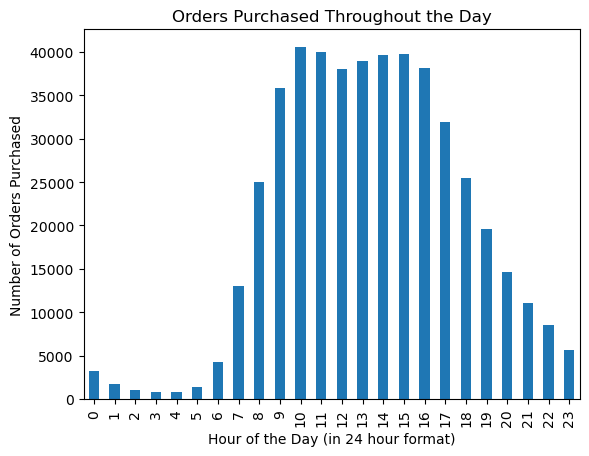

In [106]:
from matplotlib import pyplot as plt

#making df from order_hour_of_day column in insta_orders and plotting it
shop_time_of_day = insta_orders['order_hour_of_day'].value_counts().sort_index()
shop_time_of_day.plot(kind='bar',
                      title='Orders Purchased Throughout the Day',
                      xlabel='Hour of the Day (in 24 hour format)',
                      ylabel='Number of Orders Purchased');

People tend to shop for groceries during usual business hours from 8am-6pm peak hours from 10am-4pm

### [A3] What day of the week do people shop for groceries?

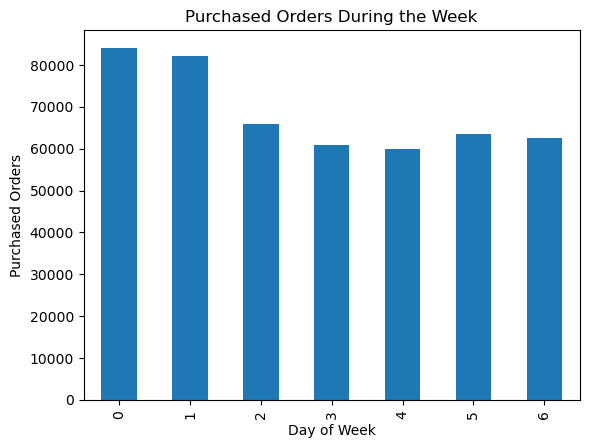

In [107]:
#making df from order_dow column in insta_orders and plotting it 
orders_dow = insta_orders['order_dow'].value_counts().sort_index()
orders_dow.plot(kind='bar',
                title='Purchased Orders During the Week',
                xlabel='Day of Week',
                ylabel='Purchased Orders');

Most people go grocery shopping on Monday 

### [A4] How long do people wait until placing another order?

In [108]:
#looking at stats for days_since_prior_order column of insta_orders
insta_orders['days_since_prior_order'].describe()

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

The majority of users wait 30 days to place an order again.

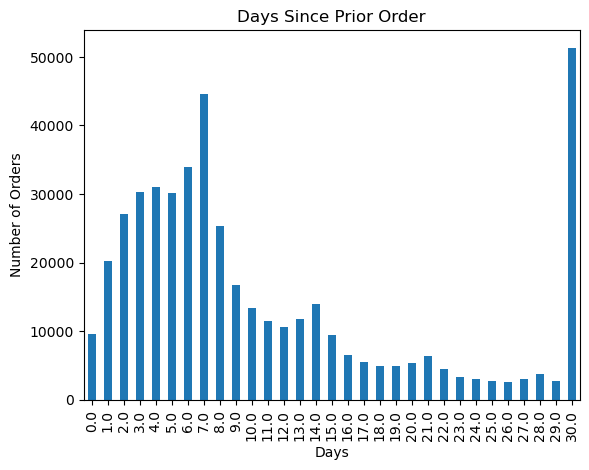

In [110]:
#making df to days since prior order for all orders and plotting 
avg_days_before_order = insta_orders['days_since_prior_order'].value_counts().sort_index()
avg_days_before_order.plot(kind='bar',
                           title='Days Since Prior Order',
                          xlabel='Days',
                          ylabel='Number of Orders');

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [111]:
#df to look at just wednesdays orders
wed_orders = insta_orders[insta_orders['order_dow'] == 2]

In [112]:
#df to look at just saturday orders
sat_orders = insta_orders[insta_orders['order_dow'] == 5]

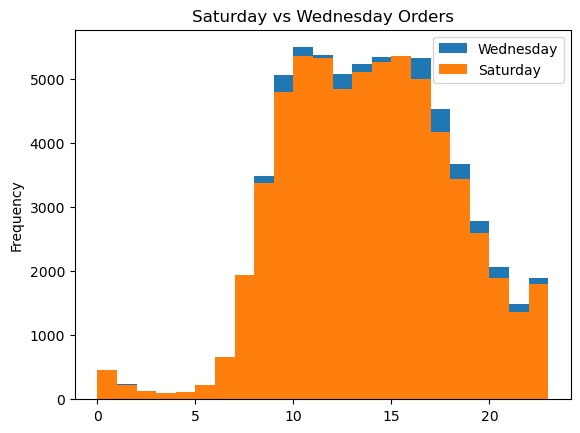

In [113]:
#plotting both in histogram 
wed_orders['order_hour_of_day'].plot(kind='hist',
                title='Saturday vs Wednesday Orders', bins=23)
sat_orders['order_hour_of_day'].plot(kind='hist', bins=23)
           
plt.legend(['Wednesday','Saturday'])
plt.show()

The hour of the day that people grocery shop and Wednesday and Saturday are very similar, however, more people tend to shop on Wednesday overall. 

### [B2] What's the distribution for the number of orders per customer?

In [114]:
number_of_orders = insta_orders['user_id'].value_counts()
number_of_orders

149605    28
193164    26
78375     25
148162    24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: user_id, Length: 157437, dtype: int64

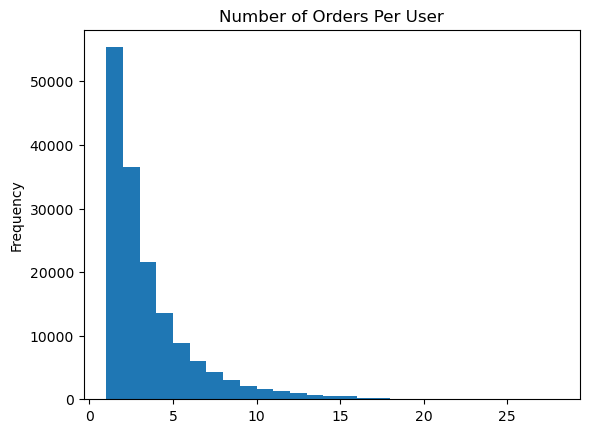

In [116]:
number_of_orders = insta_orders['user_id'].value_counts()
number_of_orders.plot(kind='hist', title='Number of Orders Per User', bins=27);

The majority of users have placed between 1-5 orders 

### [B3] What are the top 20 popular products (display their id and name)?

In [118]:
#counting the most popular products from order_products and restting index 
pop_products = order_products['product_id'].value_counts().reset_index()
pop_products.columns = ['product_id', 'value_count']
pop_products

,product_id,value_count
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
...,...,...
45568,47987,1
45569,26408,1
45570,24435,1
45571,36946,1


In [119]:
#merging pop_products df with products df to get the product names 
merge1 = pop_products.merge(products)[:20]
merge1[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


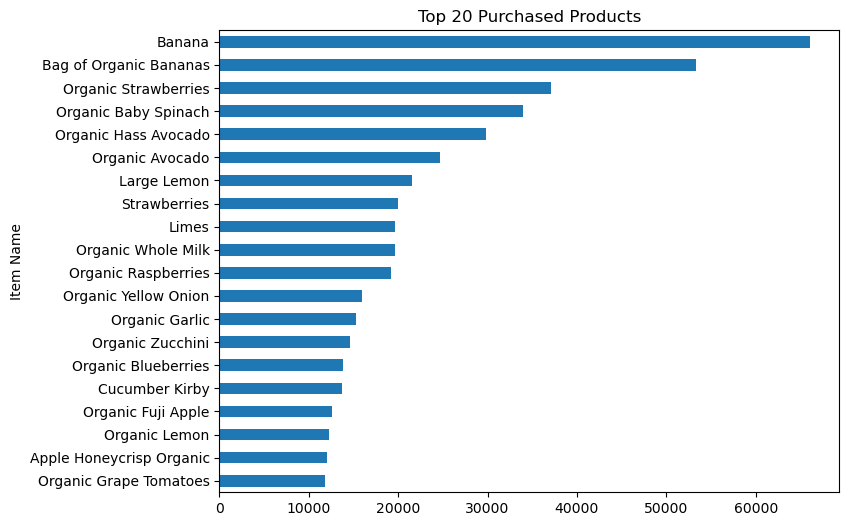

In [120]:
#plotting the product_name and value_count from  merge1 and inverting y-axis 
merge1[['product_name','value_count']].plot(kind='barh',
                                            x='product_name',
                                            y='value_count', 
                                            xlabel='Item Name',
                                            ylabel='Quantity',
                                            title='Top 20 Purchased Products', 
                                            figsize=[8,6],
                                            legend=False).invert_yaxis();

Shown are the top 20 purchased products with Bananas (non-organic) being number. All the top 20 products are perishables such as fruits and vegetables. 

In [121]:
#using groupby, nlargest, and merge
(order_products
 .groupby('product_id').agg(total_orders = ('order_id','count'))
 .reset_index()
 .nlargest(20, 'total_orders')
 .merge(products[['lower_product_name','product_id']], on = 'product_id', how = 'left')
)

,product_id,total_orders,lower_product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [122]:
#finding orders from order_products df that are reordered 
all_reordered = order_products[order_products['reordered'] == 1]
all_reordered.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
1,1,567889,1560,1.0,1
2,2,2261212,26683,1.0,1
3,3,491251,8670,35.0,1
4,4,2571142,1940,5.0,1
5,5,2456893,21616,4.0,1


In [123]:
#counting how many times each product has been reordered 
top_reordered = all_reordered['product_id'].value_counts().reset_index()
top_reordered.columns = ['product_id', 'value_count']
top_reordered.head()

,product_id,value_count
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629


In [124]:
#mergering the two df above and only looking at the top 20 product is and their respect names
merge2 = top_reordered.merge(products)[:20]
merge2[['product_id', 'product_name']]

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


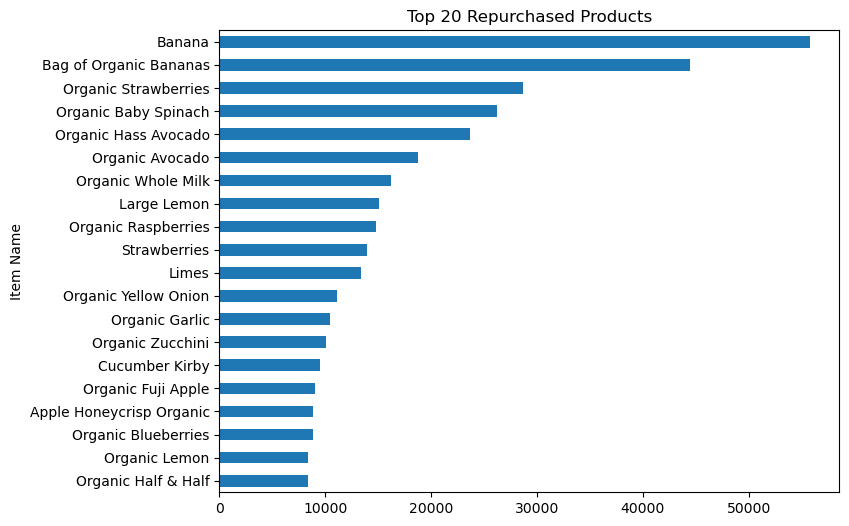

In [125]:
#plotting the top 20 products 
merge2[['product_name','value_count']].plot(kind='barh',
                                            x='product_name',
                                            y='value_count', 
                                            xlabel='Item Name',
                                            ylabel='Quantity',
                                            title='Top 20 Repurchased Products', 
                                            figsize=[8,6],
                                            legend=False).invert_yaxis();

The top 20 most repurchased items are also perishables just like the top 20 purchased. Bananas, organic banana, and organic strawberries are still top 3. 

### [C3] For each product, what proportion of its orders are reorders?

In [59]:
#gathering the total amount of products ordered and adding it to the order_products df 
order_products['product_count'] = order_products['product_id'].value_counts()
order_products.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_count
0,0,2141543,11440,17.0,0,NaN
1,1,567889,1560,1.0,1,280.0
2,2,2261212,26683,1.0,1,11.0
3,3,491251,8670,35.0,1,42.0
4,4,2571142,1940,5.0,1,49.0


In [60]:
#merging above df with products df 
merge3 = order_products.merge(products)
merge3.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_count,product_name,aisle_id,department_id,lower_product_name
0,1239,1278653,1240,2.0,1,3.0,Plain Better Than Cream Cheese,108,16,plain better than cream cheese


In [61]:
#finding the proportion of orders using aggregated mean 
proportion = merge3.groupby(['product_id','product_name'])['reordered'].agg('mean')
proportion.head(20)

product_id  product_name                  
1240        Plain Better Than Cream Cheese    1.0
Name: reordered, dtype: float64

The proportion of each products reorders varies. 